# PyTorch - MLP

In [1]:
PATH = '~/mrm_fraud/datasets/mlpfiles/'

## Christian Versloot (CIFAR10)

https://github.com/christianversloot/machine-learning-articles/blob/main/creating-a-multilayer-perceptron-with-pytorch-and-lightning.md#preparing-the-cifar-10-dataset-and-initializing-dependencies

In [1]:
import os
import torch
from torch import nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms

### Defining the MLP neural network class

In [2]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )

  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

### Runtime code

In [3]:
%%time
if __name__ == '__main__':
  
  # Set fixed random number seed
  torch.manual_seed(42)

  # Prepare CIFAR-10 dataset
  dataset = CIFAR10(os.getcwd(), download=True, transform=transforms.ToTensor())
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170M/170M [01:47<00:00, 1.58MB/s]


Extracting /Users/efonesca.dos.reis/mrm_fraud/algo_assurance/code/cifar-10-python.tar.gz to /Users/efonesca.dos.reis/mrm_fraud/algo_assurance/code
CPU times: user 5.01 s, sys: 3.26 s, total: 8.27 s
Wall time: 1min 50s


In [4]:
  # Initialize the MLP
  mlp = MLP()
  
  # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

### Defining the training loop

In [5]:
  # Run the training loop
  for epoch in range(0, 5): # 5 epochs at maximum
    
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
      
      # Get inputs
      inputs, targets = data
      
      # Zero the gradients
      optimizer.zero_grad()
      
      # Perform forward pass
      outputs = mlp(inputs)
      
      # Compute loss
      loss = loss_function(outputs, targets)
      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      optimizer.step()
      
      # Print statistics
      current_loss += loss.item()
      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

Starting epoch 1
Loss after mini-batch   500: 2.237
Loss after mini-batch  1000: 2.099
Loss after mini-batch  1500: 2.031
Loss after mini-batch  2000: 2.000
Loss after mini-batch  2500: 1.938
Loss after mini-batch  3000: 1.945
Loss after mini-batch  3500: 1.916
Loss after mini-batch  4000: 1.903
Loss after mini-batch  4500: 1.870
Loss after mini-batch  5000: 1.856
Starting epoch 2
Loss after mini-batch   500: 1.831
Loss after mini-batch  1000: 1.832
Loss after mini-batch  1500: 1.825
Loss after mini-batch  2000: 1.822
Loss after mini-batch  2500: 1.816
Loss after mini-batch  3000: 1.810
Loss after mini-batch  3500: 1.801
Loss after mini-batch  4000: 1.771
Loss after mini-batch  4500: 1.774
Loss after mini-batch  5000: 1.762
Starting epoch 3
Loss after mini-batch   500: 1.753
Loss after mini-batch  1000: 1.764
Loss after mini-batch  1500: 1.746
Loss after mini-batch  2000: 1.753
Loss after mini-batch  2500: 1.725
Loss after mini-batch  3000: 1.725
Loss after mini-batch  3500: 1.731
Loss

## Julia Nickerson (Titanic)
https://www.nickersonj.com/posts/pytorch-tabular/#model-training

In [1]:
import torch
from torch import nn

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from kaggle import api

from pathlib import Path

# Settings for matplotlib
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Specify float format for pandas tables
pd.options.display.float_format = '{:.3f}'.format


In [30]:
# Read in the training and test sets from CSV files

df = pd.read_csv(PATH+'/titanic/train.csv')
test_df = pd.read_csv(PATH+'/titanic/test.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.250,NaN,Q
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.000,0,0,110564,26.550,C52,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.000,0,1,11767,83.158,C50,C


In [31]:
# Separate the training set’s features from the label column Survived:
train_labels = df['Survived'].copy()
df = df.drop('Survived', axis=1)

### Feature Engineering

In [5]:
# View object-type columns:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
# View number-type columns:
df.describe(include=np.number)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,2.309,29.699,0.523,0.382,32.204
std,257.354,0.836,14.526,1.103,0.806,49.693
min,1.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,2.000,20.125,0.000,0.000,7.910
50%,446.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,3.000,38.000,1.000,0.000,31.000
max,891.000,3.000,80.000,8.000,6.000,512.329


In [7]:
def feature_engineering(df):
    
    # The Fare column is skewed, so taking the natural log will make it more even
    df['LogFare'] = np.log1p(df['Fare'])
    
    # Taking the first character of the Cabin column gives the deck, and mapping single characters to groups of decks; other decks will be NaN
    df['DeckGroup'] = df['Cabin'].str[0].map({'A': 'ABC', 'B': 'ABC', 'C':'ABC', 'D':'DE', 'E': 'DE', 'F': 'FG', 'G': 'FG'})

    # Add up all family members
    df['Family'] = df['SibSp'] + df['Parch']
    
    # If the person traveled alone (=1) or has any family members (=0)
    df['Alone'] = (df['Family'] == 0).map({True: 1, False: 0})
    
    # Specify the ticket frequency (how common someone's ticket is)
    df['TicketFreq'] = df.groupby('Ticket')['Ticket'].transform('count')
    
    # Extract someone's title (e.g., Mr, Mrs, Miss, Rev)
    df['Title'] = df['Name'].str.split(', ', expand=True).iloc[:, 1].str.split('.', expand=True).iloc[:, 0]
    
    # Limit titles to those in the dictionary below; other titles will be NaN
    df['Title'] = df['Title'].map({'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master'})
    
    # Change sex to numbers (male=1, female=0)
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
    
    return df


In [32]:
# Apply feature engineering:
df = feature_engineering(df)

In [33]:
# Remove columns I no longer need:
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Fare', 'SibSp', 'Parch'], axis=1)

In [10]:
df.sample(n=5)

,Pclass,Sex,Age,Embarked,LogFare,DeckGroup,Family,Alone,TicketFreq,Title
734,2,1,23.000,S,2.639,NaN,0,1,1,Mr
38,3,0,18.000,S,2.944,NaN,2,0,2,Miss
180,3,0,NaN,S,4.256,NaN,10,0,7,Miss
210,3,1,24.000,S,2.086,NaN,0,1,1,Mr
684,2,1,60.000,S,3.689,NaN,2,0,2,Mr


### Data Cleaning

In [11]:
df.isna().sum()

Pclass          0
Sex             0
Age           177
Embarked        2
LogFare         0
DeckGroup     688
Family          0
Alone           0
TicketFreq      0
Title          27
dtype: int64

In [34]:
# Fill missing values with the modes:
train_modes = df.mode().iloc[0]
train_modes


Pclass            3
Sex               1
Age          24.000
Embarked          S
LogFare       2.203
DeckGroup       ABC
Family            0
Alone             1
TicketFreq        1
Title            Mr
Name: 0, dtype: object

In [35]:
def fill_missing(df, modes):
    df = df.fillna(modes)
    return df

df = fill_missing(df, train_modes)

In [14]:
df

,Pclass,Sex,Age,Embarked,LogFare,DeckGroup,Family,Alone,TicketFreq,Title
0,3,1,22.000,S,2.110,ABC,1,0,1,Mr
1,1,0,38.000,C,4.281,ABC,1,0,1,Mrs
2,3,0,26.000,S,2.189,ABC,0,1,1,Miss
3,1,0,35.000,S,3.991,ABC,1,0,2,Mrs
4,3,1,35.000,S,2.203,ABC,0,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000,S,2.639,ABC,0,1,1,Mr
887,1,0,19.000,S,3.434,ABC,0,1,1,Miss
888,3,0,24.000,S,3.197,ABC,3,0,2,Miss
889,1,1,26.000,C,3.434,ABC,0,1,1,Mr


In [36]:
# Perform min-max scaling:
def scale_min_max(df, col_name, xmin, xmax):
    df[col_name] = (df[col_name] - xmin) / (xmax - xmin)
    return df

train_age_min = df['Age'].min()
train_age_max = df['Age'].max()
df = scale_min_max(df, 'Age', train_age_min, train_age_max)

df['Age'].describe()

count   891.000
mean      0.354
std       0.166
min       0.000
25%       0.271
50%       0.296
75%       0.435
max       1.000
Name: Age, dtype: float64

In [43]:
def add_dummies(df, cols):
    df = pd.get_dummies(df, columns=cols, dtype=int)
    return df

cols = ['Pclass', 'Embarked', 'DeckGroup', 'Title']
df = add_dummies(df, cols)

print(df.columns, '\n', len(df.columns))

Index(['Sex', 'Age', 'LogFare', 'Family', 'Alone', 'TicketFreq', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'DeckGroup_ABC', 'DeckGroup_DE', 'DeckGroup_FG', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object') 
 19


In [45]:
# Apply the same data processing steps to the test set:
test_proc = (test_df.pipe(feature_engineering)
                    .drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Fare', 'SibSp', 'Parch'], axis=1)
                    .pipe(fill_missing, train_modes)
                    .pipe(scale_min_max, 'Age', train_age_min, train_age_max)
                    .pipe(add_dummies, cols)
)

test_proc.sample(5)

,Sex,Age,LogFare,Family,Alone,TicketFreq,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,DeckGroup_ABC,DeckGroup_DE,DeckGroup_FG,Title_Master,Title_Miss,Title_Mr,Title_Mrs
306,1,0.372,5.027,3,0,2,1,0,0,0,0,1,1,0,0,0,0,1,0
214,0,0.472,2.172,6,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0
133,1,0.296,2.007,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0
294,1,0.447,2.351,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0
118,1,0.447,4.334,0,1,2,1,0,0,1,0,0,1,0,0,0,0,1,0


### Model Training



In [47]:
# Convert to tensors
x_data = torch.tensor(df.values, dtype=torch.float32)
y_data = torch.tensor(train_labels.values, dtype=torch.float32)

type(x_data), type(y_data)

(torch.Tensor, torch.Tensor)

In [50]:
# Split the data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, test_size=0.25, shuffle=True)

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_valid:', x_valid.shape)
print('y_valid:', y_valid.shape)

x_train: torch.Size([668, 19])
y_train: torch.Size([668])
x_valid: torch.Size([223, 19])
y_valid: torch.Size([223])


In [51]:
# Assign the available processor to device:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [52]:
# Define a neural network with linear, ReLU, and dropout layers
class TitanicModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(19, 64)
        self.linear2 = nn.Linear(64, 128)
        self.linear3 = nn.Linear(128, 96)
        self.linear4 = nn.Linear(96, 32)
        self.linear5 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.25)
    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.dropout(x)
        x = self.relu(self.linear2(x))
        x = self.dropout(x)
        x = self.relu(self.linear3(x))
        x = self.dropout(x)
        x = self.relu(self.linear4(x))
        x = self.linear5(x)
        return x

In [53]:
# Instantiate the model and move to device:
model = TitanicModel().to(device)
model

TitanicModel(
  (linear1): Linear(in_features=19, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=96, bias=True)
  (linear4): Linear(in_features=96, out_features=32, bias=True)
  (linear5): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.25, inplace=False)
)

In [54]:
# Define hyperparameters:
learning_rate = 0.003

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

In [55]:
# Perform forward pass to check
# Forward pass
logits = model(x_train)
print('logits:', logits[:5])

# Logits -> Probabilities b/n 0 and 1 -> Rounded to 0 or 1
pred_probab = torch.round(torch.sigmoid(logits))
print('probabilities:', pred_probab[0:5])

logits: tensor([[-0.0555],
        [-0.0077],
        [-0.0107],
        [-0.0245],
        [-0.0348]], grad_fn=<SliceBackward0>)
probabilities: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<SliceBackward0>)


In [56]:
# Define accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

In [86]:
# Train the model
# Number of epochs
epochs = 10000

# Send data to the device
x_train, x_valid = x_train.to(device), x_valid.to(device)
y_train, y_valid = y_train.to(device), y_valid.to(device)

# Empty loss lists to track values
epoch_count, train_loss_values, valid_loss_values = [], [], []

# Loop through the data
for epoch in range(epochs):

    # Put the model in training mode
    model.train()

    y_logits = model(x_train).squeeze() # forward pass to get predictions; squeeze the logits into the same shape as the labels
    y_pred = torch.round(torch.sigmoid(y_logits)) # convert logits into prediction probabilities

    loss = loss_fn(y_logits, y_train) # compute the loss   
    acc = accuracy_fn(y_train.int(), y_pred) # calculate the accuracy; convert the labels to integers

    optimizer.zero_grad() # reset the gradients so they don't accumulate each iteration
    loss.backward() # backward pass: backpropagate the prediction loss
    optimizer.step() # gradient descent: adjust the parameters by the gradients collected in the backward pass
    
    # Put the model in evaluation mode
    model.eval() 

    with torch.inference_mode():
        valid_logits = model(x_valid).squeeze()
        valid_pred = torch.round(torch.sigmoid(valid_logits))    

        valid_loss = loss_fn(valid_logits, y_valid)
        valid_acc = accuracy_fn(y_valid.int(), valid_pred)    
    
    # Print progress a total of 20 times
    if epoch % int(epochs / 20) == 0:
        print(f'Epoch: {epoch:4.0f} | Train Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Validation Loss: {valid_loss:.5f}, Accuracy: {valid_acc:.2f}%')

        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        valid_loss_values.append(valid_loss.detach().numpy())

Epoch:    0 | Train Loss: 0.68956, Accuracy: 60.63% | Validation Loss: 0.68833, Accuracy: 64.13%
Epoch:  500 | Train Loss: 0.67801, Accuracy: 60.78% | Validation Loss: 0.67117, Accuracy: 64.13%
Epoch: 1000 | Train Loss: 0.67199, Accuracy: 60.78% | Validation Loss: 0.66279, Accuracy: 64.13%
Epoch: 1500 | Train Loss: 0.66966, Accuracy: 60.78% | Validation Loss: 0.65822, Accuracy: 64.13%
Epoch: 2000 | Train Loss: 0.66861, Accuracy: 60.78% | Validation Loss: 0.65535, Accuracy: 64.13%
Epoch: 2500 | Train Loss: 0.66771, Accuracy: 60.78% | Validation Loss: 0.65314, Accuracy: 64.13%
Epoch: 3000 | Train Loss: 0.66622, Accuracy: 60.78% | Validation Loss: 0.65119, Accuracy: 64.13%
Epoch: 3500 | Train Loss: 0.66521, Accuracy: 60.78% | Validation Loss: 0.64923, Accuracy: 64.13%
Epoch: 4000 | Train Loss: 0.66283, Accuracy: 60.78% | Validation Loss: 0.64677, Accuracy: 64.13%
Epoch: 4500 | Train Loss: 0.66017, Accuracy: 60.78% | Validation Loss: 0.64342, Accuracy: 64.13%
Epoch: 5000 | Train Loss: 0.65

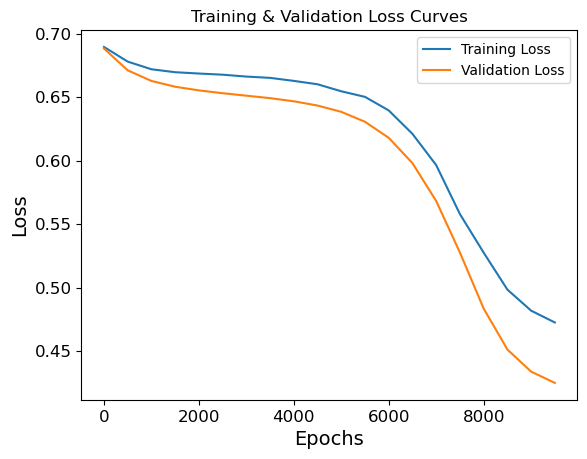

In [94]:
# Plot loss curves
plt.plot(epoch_count, train_loss_values, label='Training Loss')
plt.plot(epoch_count, valid_loss_values, label='Validation Loss')
plt.title('Training & Validation Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### Inference

In [95]:
# Convert test data to tensors
x_test = torch.tensor(test_proc.values, dtype=torch.float32)

type(x_test)

torch.Tensor

In [96]:
# Make predictions on test data
model.eval()

with torch.inference_mode():
    test_logits = model(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits)).int()

test_pred.shape, test_pred[:5]

(torch.Size([418]), tensor([0, 1, 0, 0, 1], dtype=torch.int32))

## Akshaj Verma - Medium TDS (Lower back pain)
https://medium.com/towards-data-science/pytorch-tabular-binary-classification-a0368da5bb89

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Read data
df = pd.read_csv(PATH+"Dataset_spine.csv")

df.drop(df.columns[-1], axis=1, inplace=True)
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


### EDA and Preprocessing

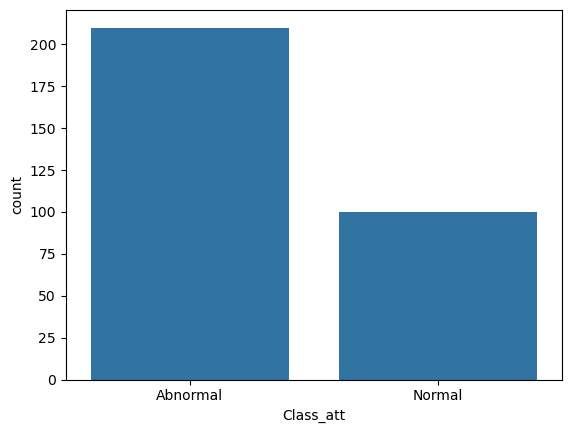

In [5]:
# Class Distribution
sns.countplot(x = 'Class_att', data=df)
plt.show()

In [4]:
# Encode Output Class
df['Class_att'] = df['Class_att'].map({'Abnormal': 1, 'Normal': 0}).astype(int)

In [5]:
# Create Input and Output Data
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [6]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

In [7]:
# Standardize Input
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Parameters

In [10]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

### Define Custom Dataloaders

In [11]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

In [12]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE)

### Define Neural Net Architecture

In [13]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(12, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [15]:
# Initialize model
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

BinaryClassification(
  (layer_1): Linear(in_features=12, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


### Train the model

In [16]:
# Define accuracy
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [17]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.68188 | Acc: 55.750
Epoch 002: | Loss: 0.59897 | Acc: 68.750
Epoch 003: | Loss: 0.53819 | Acc: 77.750
Epoch 004: | Loss: 0.49785 | Acc: 79.000
Epoch 005: | Loss: 0.50548 | Acc: 74.000
Epoch 006: | Loss: 0.42202 | Acc: 81.250
Epoch 007: | Loss: 0.42260 | Acc: 82.500
Epoch 008: | Loss: 0.41059 | Acc: 81.750
Epoch 009: | Loss: 0.37895 | Acc: 85.000
Epoch 010: | Loss: 0.37259 | Acc: 82.000
Epoch 011: | Loss: 0.35850 | Acc: 85.250
Epoch 012: | Loss: 0.36721 | Acc: 82.750
Epoch 013: | Loss: 0.32531 | Acc: 88.500
Epoch 014: | Loss: 0.33059 | Acc: 86.250
Epoch 015: | Loss: 0.33885 | Acc: 85.250
Epoch 016: | Loss: 0.31466 | Acc: 87.750
Epoch 017: | Loss: 0.30169 | Acc: 90.000
Epoch 018: | Loss: 0.26325 | Acc: 93.250
Epoch 019: | Loss: 0.26841 | Acc: 92.750
Epoch 020: | Loss: 0.23921 | Acc: 95.250
Epoch 021: | Loss: 0.21219 | Acc: 94.500
Epoch 022: | Loss: 0.23701 | Acc: 90.750
Epoch 023: | Loss: 0.24457 | Acc: 91.500
Epoch 024: | Loss: 0.19220 | Acc: 93.250
Epoch 025: | Los

### Test the model

In [73]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [41]:
y_pred_list = []
model.eval()
with torch.no_grad():
    i=0
    for X_batch in test_loader:
        print(i)
        print(X_batch.shape)
        i+=1
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

# y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
y_pred_list = np.concatenate(y_pred_list).squeeze().tolist()

0
torch.Size([64, 12])
1
torch.Size([39, 12])


In [46]:
confusion_matrix(y_test, y_pred_list)

array([[20, 11],
       [11, 61]])

In [45]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        31
           1       0.85      0.85      0.85        72

    accuracy                           0.79       103
   macro avg       0.75      0.75      0.75       103
weighted avg       0.79      0.79      0.79       103



# Notes

- CV uses DataLoader to iterate over training data, while JN uses the the whole training set every training loop.
- Double check PyTorch Dataset and DataLoader
- ReLU, BatchNorm, Dropout (AV)
- Backpropagation pass: loss.backward() and optimizer.step()
- AV: To tell PyTorch that we do not want to perform back-propagation during inference, we use torch.no_grad() which reduces memory usage and speeds up computation. While JN uses torch.inference_mode().

# MLP for fraud

In [1]:
# General
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import typing
from typing import Union, Tuple, Dict, List

# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torcheval.metrics.classification import BinaryRecall, BinaryPrecision, BinaryF1Score, BinaryAccuracy

# Preprocess model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder, CountEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler

# Model performance metrics
from sklearn.metrics import (
         recall_score, precision_score,f1_score, 
         precision_recall_curve, roc_auc_score, roc_curve,
)

## Load data

In [2]:
PATH = '~/mrm_fraud/datasets/TabFormer/'

In [3]:
def loadTabFormer(path, year=[]):
    # Load data
    df = pd.concat([pd.read_csv(path+'card_transaction.v1-'+str(y)+'.csv') for y in year])
    df.reset_index(drop=True, inplace=True)
    df.sort_values(by='transactionTime', inplace=True)
    # Convert variables
    df.transactionTime = pd.to_datetime(df.transactionTime)
    df.MerchantName = df.MerchantName.astype(str)
    df.MCC = df.MCC.astype(str)
    df.UseChip = df.UseChip.astype(str)
    df.Zip = df.Zip.astype(int).astype(str)
    
    return df

In [4]:
def fraud_summary(data: pd.DataFrame,
                  tw: str=None, 
                  trxTime_col: str=None, 
                  trxAmount_col: str=None, 
                  isFraud_col: set=None) -> pd.DataFrame:
    summary = data.groupby(pd.Grouper(key=trxTime_col, freq=tw)).agg(
        total_transactions=(trxAmount_col, "count"),
        total_fraud_cases=(isFraud_col, "sum"),
        total_fraud_value=(trxAmount_col, lambda x: x[x.index.isin(df.loc[df[isFraud_col] == 1].index)].sum()),
        total_transaction_value=(trxAmount_col, "sum"),
    )#.set_index(trxTime_col)
    return summary

In [5]:
def plot_fraud(df_fraud_summary: pd.DataFrame):

    axis_label_fs = 9
    axis_tick_fs = 8
    legend_fs = 8
    title_fs = 9
    
    fig, ax = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

    # Variables
    x = df_fraud_summary.index
    fraud_cases = df_fraud_summary.total_fraud_cases
    fraud_value = df_fraud_summary.total_fraud_value
    num_trx = df_fraud_summary.total_transactions
    trx_val = df_fraud_summary.total_transaction_value
    
    # Number and value of fraud
    ax[0].bar(x, fraud_cases, width=20, label='Fraud cases')
    ax01 = ax[0].twinx()
    ax01.plot(x, fraud_value/1e3, c='tab:red', marker='o', label='Fraud value')
    
    # Class imbalance
    fraud_imb = 100*fraud_cases/num_trx
    ax[1].plot(x, fraud_imb, color='k')
    
    # Total number of transactions
    ax[2].bar(x, num_trx/1e3, width=20, color='C2')
    
    
    # Formatting
    
    ax[0].set_ylabel('No. of fraud', fontsize=axis_label_fs)
    ax[0].legend(loc='upper left', bbox_to_anchor=(0.01, 0.99), fontsize=legend_fs)
    ax[0].set_title('(a)', fontsize=title_fs, loc='left')
    ax01.set_ylabel('Fraud value '+r'$(\times 10^3 \$)$', fontsize=axis_label_fs)
    ax01.legend(loc='upper left', bbox_to_anchor=(0.01, 0.83), fontsize=legend_fs)
    
    ax[1].grid(axis='both')
    ax[1].set_title('(b)', loc='left', fontsize=title_fs)
    ax[1].set_ylabel('Class imbalance (%)', fontsize=axis_label_fs)
    
    ax[2].set_ylabel('No. of transactions '+r'$(\times 10^3)$', fontsize=axis_label_fs)
    ax[2].set_title('(c)', loc='left', fontsize=title_fs)
    ax[2].set_xlabel('Time', fontsize=axis_label_fs)
    
    
    ax[0].set_xticks(x, x, rotation=90, fontsize=axis_tick_fs)
    # ax01.set_yticks(np.arange(7), np.arange(7))
    ax[1].set_xticks(x, x, rotation=90, fontsize=axis_tick_fs)
    # if tw == 'week':
    #     xindex = x.index.date
    #     [x.index.date if tw=='week' else x.index]
    ax[2].set_xticks(x.date, x.date, rotation=90, fontsize=axis_tick_fs)
    
    ax[0].tick_params(labelsize=axis_tick_fs)
    ax01.tick_params(labelsize=axis_tick_fs)
    ax[1].tick_params(labelsize=axis_tick_fs)
    ax[2].tick_params(labelsize=axis_tick_fs)
    
    # xlim=[1996, 2019]
    # ax[0].set_xlim(xlim)
    # ax[0].set_xlim(xlim)
    
    plt.subplots_adjust(hspace=0.3)
    # plt.savefig(fig_folder+'TabFormer_dataset.png', bbox_inches='tight', dpi=300)
    plt.show()

In [6]:
%%time
df = loadTabFormer(PATH, year=[2008])

CPU times: user 1.88 s, sys: 212 ms, total: 2.09 s
Wall time: 2.12 s


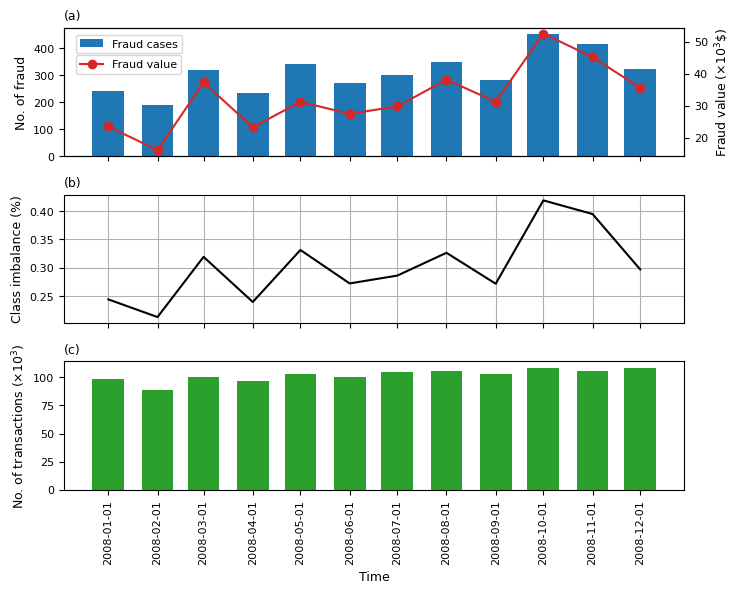

In [7]:
df_fraud_summary = fraud_summary(df, 
                                 tw='1MS', 
                                 trxTime_col='transactionTime', 
                                 trxAmount_col='Amount', 
                                 isFraud_col='isFraud')    
plot_fraud(df_fraud_summary)

## Define features

In [7]:
# --- Predictors

# Numerical variables
numerical_vars = ['Amount']
# Frequency encoding variables
freq_enc_vars = ['hour']
# Target encoding variables
target_enc_vars = ['MerchantName', 'MerchantCity',  'MerchantState', 'Zip', 'MCC', 'Error']
# One-hot encoding variables
onehot_enc_vars = ['weekday', 'UseChip']
# Categorical variables
cat_vars = freq_enc_vars+target_enc_vars+onehot_enc_vars
# List of all predictors
var_cols = numerical_vars+freq_enc_vars+target_enc_vars+onehot_enc_vars

## Preprocessing

In [8]:
# --- Encoding/Scaling ---
def onehot_transform(df, ohe_vars):
    ''' One-hot encoder. '''
    # Define one-hot encoder
    onehot_encoder = OneHotEncoder(sparse_output=False)
    
    # Fit-transform variables
    df_onehot = pd.DataFrame(onehot_encoder.fit_transform(df[ohe_vars].astype('str')))
    df_onehot.columns = onehot_encoder.get_feature_names_out()
    df_onehot.index = df.index
    
    # Remove original categorical variables
    df.drop(ohe_vars, axis=1, inplace=True)
    
    # Concatenate data set with one-hot columns
    df = pd.concat([df, df_onehot], axis=1)
    return df
def encode_scale_data(X_train, X_test, y_train, numerical_vars, target_enc_vars, freq_enc_vars, onehot_enc_vars):
    ''' Encode and scale data. '''
    pd.set_option('future.no_silent_downcasting', True)
    
    # Target encoding
    if target_enc_vars:
        target_encoder = TargetEncoder(cols=target_enc_vars)
        X_train = target_encoder.fit_transform(X_train, y_train)
        X_test = target_encoder.transform(X_test)
    
    # Frequency encoding
    if freq_enc_vars:
        freq_encoder = CountEncoder(cols=freq_enc_vars)
        X_train = freq_encoder.fit_transform(X_train, y_train)
        X_test = freq_encoder.transform(X_test)
    
    # Scaling
    if numerical_vars:
        scaler = StandardScaler(with_mean=True, with_std=True).set_output(transform="pandas")
        scale_cols = numerical_vars+freq_enc_vars+target_enc_vars
        scaler.fit(X_train[scale_cols])
        X_train = pd.concat([X_train.drop(scale_cols, axis=1), scaler.transform(X_train[scale_cols])], axis=1)
        X_test = pd.concat([X_test.drop(scale_cols, axis=1), scaler.transform(X_test[scale_cols])], axis=1)
    
    # One-hot encoding
    if onehot_enc_vars:
        X_train = onehot_transform(X_train, onehot_enc_vars)
        X_test = onehot_transform(X_test, onehot_enc_vars)

    return X_train, X_test

In [9]:
# Class imbalance
def class_imbalance(X_train, y_train, 
                    over_sample=True,
                    over_sample_ratio='auto',
                    under_sample=True, 
                    under_sample_ratio='auto', 
                    geo_vars=None, 
                    cat_vars=None):
    
    # Undersample
    if under_sample:
        # Random Under Sampler
        undersampler = RandomUnderSampler(sampling_strategy=under_sample_ratio, random_state=1)
        X_train, y_train = undersampler.fit_resample(X_train, y_train)

    # Oversample
    if over_sample:
        # Combine geographical features
        X_train = combine_geography(X_train, geo_vars=geo_vars)
    
        # SMOTENC
        categorical_features = [v for v in cat_vars if v not in geo_vars]+['_'.join(geo_vars)]
        smotenc = SMOTENC(categorical_features=categorical_features, random_state=1)
        X_train, y_train = smotenc.fit_resample(X_train, y_train)
    
        # Split geographical features
        X_train = split_geography(X_train, geo_vars=geo_vars)

    return X_train.sort_index(), y_train.sort_index()

In [10]:
# Split data into Train/Test sets
X, y = df[var_cols], df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
y_train.sum()/len(y_train)

0.002880151373972177

In [12]:
%%time
# Class imbalance
X_train, y_train = class_imbalance(X_train, y_train, 
                                   under_sample=True,
                                   under_sample_ratio=0.1,#'not minority', 
                                   over_sample=False,
                                  )

CPU times: user 129 ms, sys: 23.1 ms, total: 152 ms
Wall time: 150 ms


In [13]:
y_train.sum()/len(y_train)

0.09090909090909091

In [14]:
%%time
# Encode and scale data
X_train, X_test = encode_scale_data(X_train, X_test, y_train, numerical_vars, target_enc_vars, freq_enc_vars, onehot_enc_vars)

CPU times: user 444 ms, sys: 58.2 ms, total: 502 ms
Wall time: 506 ms


## Model Parameters

In [22]:
EPOCHS = 10
BATCH_SIZE = 64
LEARNING_RATE = 0.001
TOL = 1e-4
N_CONSEC_ITER = 10

## Define Custom Dataloaders

In [16]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __getitem__(self, index):
        return self.X[index], self.y[index]
        
    def __len__ (self):
        return len(self.X)

## test data    
class TestData(Dataset):
    
    def __init__(self, X):
        self.X = X
        
    def __getitem__(self, index):
        return self.X[index]
        
    def __len__ (self):
        return len(self.X)

In [59]:
train_data = TrainData(torch.tensor(X_train.values, dtype=torch.float32), 
                       torch.tensor(y_train.values, dtype=torch.float32))
test_data = TestData(torch.tensor(X_test.values, dtype=torch.float32))

train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

## Define Neural Net Architecture

In [168]:
class BinaryMLP(nn.Module):
    def __init__(self, 
                 input_size: int,
                 layer1_size: int=None,
                 layer2_size: int=None,
                 layer3_size: int=None,
                 learning_rate: float=1e-3,
                 max_epochs: int=200,
                 tol: float=1e-4,
                 n_consec_iter: int=10,
                 verbose: bool=True,
                ) -> None:
        super().__init__()
        # Training parameters
        self.input_size = input_size
        self.layer1_size = layer1_size
        if self.layer1_size == None:
            self.layer1_size = int(2**np.ceil(np.log2(self.input_size)))
        self.layer2_size = layer2_size
        if self.layer2_size == None:
            self.layer2_size = int(self.layer1_size/2)
        self.layer3_size = layer3_size
        if self.layer3_size == None:
            self.layer3_size = int(self.layer2_size/2)
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.tol = tol
        self.n_consec_iter = n_consec_iter
        self.verbose = verbose

        # Layers
        self.layer1 = nn.Linear(self.input_size, self.layer1_size)
        self.layer2 = nn.Linear(self.layer1_size, self.layer2_size)
        self.layer3 = nn.Linear(self.layer2_size, self.layer3_size)
        self.layer_out = nn.Linear(self.layer3_size, 1)
        # Activation, Dropout, and Batch Normalisation
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(self.layer1_size)
        self.batchnorm2 = nn.BatchNorm1d(self.layer2_size)
        self.batchnorm3 = nn.BatchNorm1d(self.layer3_size)

    def forward(self, x):
        # Layer 1
        x = self.relu(self.layer1(x))
        x = self.batchnorm1(x)
        x = self.dropout(x)
        # Layer 2
        x = self.relu(self.layer2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        # Layer 3
        x = self.relu(self.layer3(x))
        x = self.batchnorm3(x)
        x = self.dropout(x)
        # Output layer
        x = self.layer_out(x)

        return x

    def fit(self, train_loader: DataLoader):
        # Send model to device
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.to(device)
        
        # Loss and Optimizer
        loss_function = nn.BCEWithLogitsLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        
        # Stop criterion variables
        avg_loss_old, count_iter = float('inf'), 0

        # Initialize metrics
        recall = BinaryRecall().to(device)
        precision = BinaryPrecision().to(device)
        f1 = BinaryF1Score().to(device)
        accuracy = BinaryAccuracy().to(device)

        # Training loop
        self.train()
        for e in range(1, self.max_epochs+1):
            epoch_loss = 0
            
            # Reset epoch loss and metrics
            recall.reset()
            precision.reset()
            f1.reset()
            accuracy.reset()
        
            for X_batch, y_batch in train_loader:
                # Send data to device
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                
                # Zero the gradients
                optimizer.zero_grad()
                
                # Forward pass
                y_logit = self(X_batch)
                y_pred_prob = torch.sigmoid(y_logit)
                y_pred = torch.round(y_pred_prob)

                # Compute loss
                loss = loss_function(y_logit, y_batch.unsqueeze(1))
                epoch_loss += loss.item()
                
                # Backward pass and optimization
                loss.backward()
                optimizer.step()
                
                # Compute metrics
                recall.update(y_pred_prob.squeeze(), y_batch.int())
                precision.update(y_pred_prob.squeeze(), y_batch.int())
                f1.update(y_pred_prob.squeeze(), y_batch.int())
                accuracy.update(y_pred_prob.squeeze(), y_batch.int())

            avg_loss = epoch_loss / len(train_loader)
            
            # Print progress first, last, and ten times
            if self.verbose:
                if e % int(self.max_epochs/10) == 0 or e == 1 or e == self.max_epochs:
                    print(f'Epoch {e+0:03}: |',
                          f'Loss: {avg_loss:.5f} |',
                          f'Accuracy: {accuracy.compute().item():.3f} |',
                          f'Recall: {recall.compute().item():.3f} |',
                          f'Precision: {precision.compute().item():.3f} |',
                          f'F1: {f1.compute().item():.3f}')
        
            # Stop criterion
            if abs(avg_loss - avg_loss_old) <= self.tol:
                count_iter += 1
                print(f'Current Epoch: {e} |',
                      f'Loss change: {abs(loss.item() - avg_loss_old):.1e} |',
                      f'Consecutive stop iterations: {count_iter}')
                if count_iter == self.n_consec_iter:
                    print('Early stop criterion reached.')
                    break
            else:
                count_iter = 0
            avg_loss_old = avg_loss
        print(f'Epoch {e+0:03}: |',
              f'Loss: {avg_loss:.5f} |',
              f'Accuracy: {accuracy.compute().item():.3f} |',
              f'Recall: {recall.compute().item():.3f} |',
              f'Precision: {precision.compute().item():.3f} |',
              f'F1: {f1.compute().item():.3f}')
        
    def predict_proba(self, test_loader: DataLoader):
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.to(device)
        y_pred_prob_list = []
        self.eval()
        with torch.no_grad():
            for X_batch in test_loader:
                # Send data to device
                X_batch = X_batch.to(device)
        
                # Forward pass
                y_logit = model(X_batch)
                y_pred_prob_list.append(torch.sigmoid(y_logit))
        
        return torch.cat(y_pred_prob_list, dim=0).squeeze().detach().numpy()
        
    def predict(self, test_loader: DataLoader):
        y_pred_prob = self.predict_proba(test_loader)
        return (y_pred_prob >= 0.5).astype(int)

In [37]:
class SimpleFraudMLP(nn.Module):
    def __init__(self, input_size: str, learning_rate: float=0.001) -> None:
        super().__init__()
        # Layers
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1)
        # Activation, Dropout, and Batch Normalisation
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(32)
        self.batchnorm3 = nn.BatchNorm1d(16)

    def forward(self, x):
        # Layer 1
        x = self.relu(self.layer1(x))
        x = self.batchnorm1(x)
        x = self.dropout(x)
        # Layer 2
        x = self.relu(self.layer2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        # Layer 3
        x = self.relu(self.layer3(x))
        x = self.batchnorm3(x)
        x = self.dropout(x)
        # Output layer
        x = self.layer_out(x)

        return x

In [38]:
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device:', device)

# Initialize model
model = FraudMLP(input_size=X_train.shape[1])
model.to(device)
print(model)
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

Device: cpu
FraudMLP(
  (layer1): Linear(in_features=17, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=16, bias=True)
  (layer_out): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [51]:
# Perform forward pass to check
i=0
for X_batch, y_batch in train_loader:
    if y_batch.sum() != 0:
        print(i)
        logits = model(X_batch)
        print('logits:', logits[:5])
        pred_prob = torch.sigmoid(logits)
        print('probabilities:', pred_prob[:5])
        pred = torch.round(pred_prob).int()
        print('predictions:', pred[:5])
        break
    i+=1

440
logits: tensor([[-1.8575],
        [-1.7129],
        [-2.0815],
        [-2.0358],
        [-1.9547]], grad_fn=<SliceBackward0>)
probabilities: tensor([[0.1350],
        [0.1528],
        [0.1109],
        [0.1155],
        [0.1240]], grad_fn=<SliceBackward0>)
predictions: tensor([[0],
        [0],
        [0],
        [0],
        [0]], dtype=torch.int32)


## Train the model

In [ ]:
# Define metrics
recall = BinaryRecall()
precision = BinaryPrecision()
f1 = BinaryF1Score()
accuracy = BinaryAccuracy()

# Initalize stop criterion variables
loss_old, epoch_old = 0, 0

model.train()
for e in range(1, EPOCHS+1):
    # Reset epoch loss and metrics
    epoch_loss = 0    
    recall.reset()
    precision.reset()
    f1.reset()
    accuracy.reset()

    for X_batch, y_batch in train_loader:
        # Send data to device
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        y_logit = model(X_batch)
        y_pred_prob = torch.sigmoid(y_logit)
        

        # Compute loss
        loss = loss_function(y_logit, y_batch.unsqueeze(1))
        
        # Compute metrics
        recall.update(y_pred_prob.squeeze(), y_batch.int())
        precision.update(y_pred_prob.squeeze(), y_batch.int())
        f1.update(y_pred_prob.squeeze(), y_batch.int())
        accuracy.update(y_pred_prob.squeeze(), y_batch.int())

        # Backward pass
        loss.backward()
        
        # Parameter update
        optimizer.step()
        
        epoch_loss += loss.item()

    if e % 1 == 0:
        print(f'Epoch {e+0:03}: |',
              f'Accuracy: {accuracy.compute():.3f} |',
              f'Loss: {epoch_loss/len(train_loader):.5f} |',
              f'Recall: {recall.compute().item():.3f} |',
              f'Precision: {precision.compute():.3f} |',
              f'F1: {f1.compute():.3f}',
             )

    # Stop criterion
    if (e - epoch_old == 1) & (abs(loss.item() - loss_old) <= TOL):
        count_iter += 1
        print(f'Entered stop criterion at epoch {e}')
        print(f'Loss change {abs(loss.item() - loss_old):.1e}')
        print('Consecutive iterations', count_iter)
        if count_iter == n_consec_iter:
            print('Stop criterion reached.')
            break
    else:
        count_iter = 0
    epoch_old = e
    loss_old = loss.item()

## Test the model

In [473]:
y_pred_prob_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        # Send data to device
        X_batch = X_batch.to(device)

        # Forward pass
        y_logit = model(X_batch)
        y_pred_prob_list.append(torch.sigmoid(y_logit))

y_pred_prob = torch.cat(y_pred_prob_list, dim=0).squeeze().cpu().numpy()
y_pred = (y_pred_prob >= 0.5).astype(int)

# # Compute metrics
metric={}
metrics['mlp'] = {
        'recall_score': recall_score(y_test, y_pred),
        'precision_score': precision_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'precision_recall_curve': precision_recall_curve(y_test, y_pred_prob),
        'roc_auc_score': roc_auc_score(y_test, y_pred_prob),
        'roc_curve': roc_curve(y_test, y_pred_prob)
    }

## Full run

In [63]:
def train_mlp(model, X_train: pd.DataFrame, y_train: pd.DataFrame, batch_size: int=64):
    # Train DataLoader
    train_data = TrainData(torch.tensor(X_train.values, dtype=torch.float32), 
               torch.tensor(y_train.values, dtype=torch.float32))
    train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)
    print(f'Train loader size: {len(train_loader)} batches')

    # Train model
    model.fit(train_loader)

In [44]:
def evaluate_mlp(model, X_test, y_test, batch_size: int=64):
    # Test DataLoader
    test_data = TestData(torch.tensor(X_test.values, dtype=torch.float32))
    test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)
    print(f'Test loader size: {len(test_loader)} batches')
    
    # Model predictions
    pred = model.predict(test_loader)
    # Prediction probabilities
    pred_prob = model.predict_proba(test_loader)
    
    # Metrics
    metrics = {
        'recall_score': recall_score(y_test, pred),
        'precision_score': precision_score(y_test, pred),
        'f1_score': f1_score(y_test, pred),
        'precision_recall_curve': precision_recall_curve(y_test, pred_prob),
        'roc_auc_score': roc_auc_score(y_test, pred_prob),
        'roc_curve': roc_curve(y_test, pred_prob)
    }

    return metrics

In [169]:
# Initialize model
model = BinaryMLP(input_size=X_train.shape[1], learning_rate=1e-3, max_epochs=200, verbose=True)

In [170]:
model

BinaryMLP(
  (layer1): Linear(in_features=17, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=8, bias=True)
  (layer_out): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [161]:
%%time
# Train model
train_mlp(model, X_train, y_train)

Train loader size: 485 batches
Epoch 001: | Loss: 0.51054 | Accuracy: 0.754 | Recall: 0.814 | Precision: 0.244 | F1: 0.376
Epoch 020: | Loss: 0.08071 | Accuracy: 0.972 | Recall: 0.853 | Precision: 0.845 | F1: 0.849
Epoch 040: | Loss: 0.06966 | Accuracy: 0.975 | Recall: 0.868 | Precision: 0.858 | F1: 0.863
Epoch 060: | Loss: 0.06837 | Accuracy: 0.976 | Recall: 0.865 | Precision: 0.868 | F1: 0.866
Current Epoch: 64 | Loss change: 2.7e-02 | Consecutive stop iterations: 1
Epoch 080: | Loss: 0.06416 | Accuracy: 0.976 | Recall: 0.873 | Precision: 0.867 | F1: 0.870
Current Epoch: 84 | Loss change: 9.7e-03 | Consecutive stop iterations: 1
Epoch 100: | Loss: 0.06458 | Accuracy: 0.976 | Recall: 0.874 | Precision: 0.868 | F1: 0.871
Current Epoch: 115 | Loss change: 4.5e-02 | Consecutive stop iterations: 1
Epoch 120: | Loss: 0.06122 | Accuracy: 0.977 | Recall: 0.874 | Precision: 0.876 | F1: 0.875
Epoch 140: | Loss: 0.05955 | Accuracy: 0.978 | Recall: 0.883 | Precision: 0.876 | F1: 0.880
Epoch 160:

In [162]:
# Evaluate model
metrics = evaluate_mlp(model, X_test, y_test)

Test loader size: 3824 batches


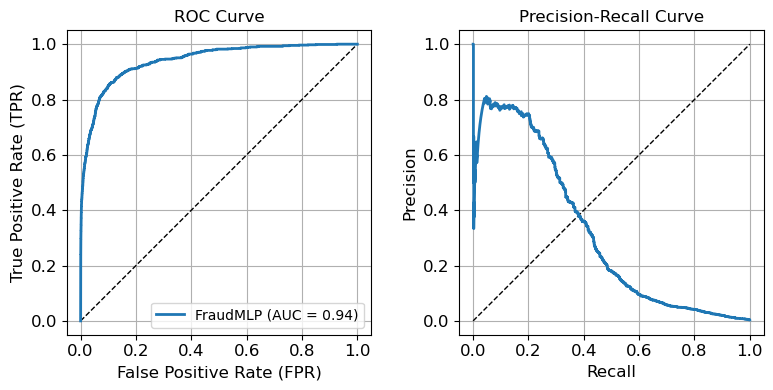

In [166]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# ROC curve
plot_roc_curve(metrics['roc_curve'], metrics['roc_auc_score'], model_name='FraudMLP', color='C'+str(0), ax=ax[0])
# PR curve
plot_precision_recall_curve(metrics['precision_recall_curve'], color='C'+str(0), ax=ax[1])

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

# plt.savefig(fig_folder+'roc_pr_curve.png', dpi=300)
plt.show()

In [165]:
models_metrics=[]
models_metrics.append([metrics['precision_score'], 
                       metrics['recall_score'], 
                       metrics['f1_score'], 
                       metrics['roc_auc_score']])
pd.DataFrame(models_metrics, columns=['Precision', 'Recall', 'F1', 'ROC-AUC'], index=['MLP']).round(3).T

,MLP
Precision,0.105
Recall,0.591
F1,0.178
ROC-AUC,0.942


In [30]:
# --- Precision recall curve ---
def plot_precision_recall_curve(model_pr_curve, color='C0', lw=2, marker=None, ax=None, 
                                title_fs=12, axis_label_fs=12, axis_tick_fs=12):
    ''' Plot the precision-recall curve.'''
    # Compute the precision, recall and threshold
    precision, recall, thresholds = model_pr_curve
    
    # fig, ax = plt.subplots(figsize=(4.5, 4))
    if ax is None:
        ax = plt.gca()
    
    # Plot the curve
    ax.plot([0, 1], [0, 1], color='k', linestyle='--', lw=1)  # Plot the diagonal line (random classifier)
    ax.plot(recall, precision, color=color, marker=marker, lw=lw)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('Recall', fontsize=axis_label_fs)
    ax.set_ylabel('Precision', fontsize=axis_label_fs)
    ax.set_title('Precision-Recall Curve', fontsize=title_fs)
    ax.tick_params(labelsize=axis_tick_fs)
    ax.grid(True)

    plt.tight_layout()
    # plt.show()
    # plt.savefig('precision_recall_curve.png', dpi=500, bbox_inches='tight')

In [31]:
# Plot the ROC curve
def plot_roc_curve(model_roc_curve, model_roc_auc, color='C0', model_name=None, ax=None, 
                   lw=2, title_fs=12, axis_label_fs=12, legend_fs=10, axis_tick_fs=12):
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = model_roc_curve
    roc_auc = model_roc_auc

    # fig, ax = plt.subplots(figsize=(4.5, 4))
    if ax is None:
        ax = plt.gca()

    ax.plot([0, 1], [0, 1], color='k', linestyle='--', lw=1)  # Plot the diagonal line (random classifier)
    ax.plot(fpr, tpr, color=color, lw=lw, label=f'{model_name} (AUC = {roc_auc:.2f})')
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate (FPR)', fontsize=axis_label_fs)
    ax.set_ylabel('True Positive Rate (TPR)', fontsize=axis_label_fs)
    ax.set_title('ROC Curve', fontsize=title_fs)
    ax.legend(loc='lower right', fontsize=legend_fs)
    ax.tick_params(labelsize=axis_tick_fs)
    ax.grid(True)
    # plt.show()


# HERE

# Archive

In [377]:
# Define accuracy
def binary_acc(y_pred_prob, y_test, threshold=0.5):
    y_pred = (y_pred_prob >= threshold).int()

    correct_results_sum = (y_pred == y_test.unsqueeze(1)).sum().float()
    acc = correct_results_sum/y_test.shape[0]

    # print(correct_results_sum)
    # print(y_test.shape)
    # print(y_test.shape[0])
    
    return acc

In [345]:
# Define recall
def binary_rec(y_pred_prob, y_test, threshold=0.5):
    y_pred = (y_pred_prob >= threshold).int()

    true_positives = ((y_pred == 1) & (y_test.unsqueeze(1) == 1)).sum().float()
    positives = y_test.sum()
    rec = true_positives / positives

    # print('TP = ', true_positives)
    # print('P = ', positives)
    # print('Recall = ', rec)
    
    return rec

In [348]:
# Define precision
def binary_pre(y_pred_prob, y_test, threshold=0.5):
    y_pred = (y_pred_prob >= threshold).int()

    true_positives = ((y_pred == 1) & (y_test.unsqueeze(1) == 1)).sum().float()
    predicted_positives = (y_pred == 1).sum()
    pre = true_positives / predicted_positives

    # print('TP = ', true_positives)
    # print('P = ', positives)
    # print('Recall = ', rec)
    
    return pre

In [378]:
model.train()
for e in range(1, EPOCHS+1):
    # Set epoch loss and metrics to zero
    epoch_loss = 0
    epoch_recall, epoch_precision, epoch_f1 = 0, 0, 0
    epoch_acc = 0
    # epoch_rec = 0
    recall.reset()
    precision.reset()
    f1.reset()
    accuracy.reset()
    epoch_y_pred_prob = []
    epoch_y_batch = []
    for X_batch, y_batch in train_loader:
        # Send data to device
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        y_logit = model(X_batch)
        y_pred_prob = torch.sigmoid(y_logit)
        

        # Compute loss
        loss = loss_function(y_logit, y_batch.unsqueeze(1))
        
        # Compute metrics
        recall.update(y_pred_prob.squeeze(), y_batch.int())
        precision.update(y_pred_prob.squeeze(), y_batch.int())
        f1.update(y_pred_prob.squeeze(), y_batch.int())
        accuracy.update(y_pred_prob.squeeze(), y_batch.int())

        acc = binary_acc(y_logit, y_batch.unsqueeze(1))
        epoch_y_pred_prob.append(y_pred_prob)
        epoch_y_batch.append(y_batch)

        # Backward pass
        loss.backward()
        
        # Parameter update
        optimizer.step()
        
        epoch_loss += loss.item()

    epoch_y_pred_prob = torch.cat(epoch_y_pred_prob, dim=0)
    epoch_y_batch = torch.cat(epoch_y_batch, dim=0)
    epoch_rec = binary_rec(epoch_y_pred_prob, epoch_y_batch)
    epoch_pre = binary_pre(epoch_y_pred_prob, epoch_y_batch)
    epoch_acc = binary_acc(epoch_y_pred_prob, epoch_y_batch)
    print(f'Epoch {e+0:03}: |',
          f'Loss: {epoch_loss/len(train_loader):.5f} |',
          f'Recall: {recall.compute().item():.3f} - {epoch_rec:.3f} |',
          f'Precision: {precision.compute():.3f} - {epoch_pre:.3f} |',
          f'Accuracy: {accuracy.compute():.3f} - {epoch_acc:.3f} |',
          f'F1: {f1.compute():.3f}',
         )

Epoch 001: | Loss: 0.05266 | Recall: 0.888 - 0.888 | Precision: 0.900 - 0.900 | Accuracy: 0.981 - 0.981 | F1: 0.894
Epoch 002: | Loss: 0.05250 | Recall: 0.889 - 0.889 | Precision: 0.896 - 0.896 | Accuracy: 0.980 - 0.980 | F1: 0.892
Epoch 003: | Loss: 0.05231 | Recall: 0.883 - 0.883 | Precision: 0.895 - 0.895 | Accuracy: 0.980 - 0.980 | F1: 0.889
Epoch 004: | Loss: 0.05212 | Recall: 0.885 - 0.885 | Precision: 0.900 - 0.900 | Accuracy: 0.981 - 0.981 | F1: 0.892
Epoch 005: | Loss: 0.05187 | Recall: 0.888 - 0.888 | Precision: 0.895 - 0.895 | Accuracy: 0.980 - 0.980 | F1: 0.892
Epoch 006: | Loss: 0.05216 | Recall: 0.880 - 0.880 | Precision: 0.903 - 0.903 | Accuracy: 0.981 - 0.981 | F1: 0.891
Epoch 007: | Loss: 0.05216 | Recall: 0.883 - 0.883 | Precision: 0.898 - 0.898 | Accuracy: 0.980 - 0.980 | F1: 0.890
Epoch 008: | Loss: 0.05050 | Recall: 0.888 - 0.888 | Precision: 0.902 - 0.902 | Accuracy: 0.981 - 0.981 | F1: 0.895
Epoch 009: | Loss: 0.05041 | Recall: 0.887 - 0.887 | Precision: 0.902 - 